Given a dataframe "w-history" of year-months, stock permnos, stock weights in a portfolio, and excess returns, calculate each months cumulative excess returns.  

In [37]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthBegin

mkt_path = "/teamspace/uploads/mkt_ind.csv"
mkt = pd.read_csv(mkt_path)

rfr = mkt[['year','month','RF']]
mkt_ret = mkt[['year','month','sp_ret']]

#Import data:

portfolio_path = "/teamspace/studios/this_studio/optimized_portfolio.csv"
portfolio = pd.read_csv(portfolio_path)

In [38]:

#convert into Year and Month:
portfolio[['year', 'month']] = portfolio['year_month'].str.split('-', expand=True)

# Convert 'year' to integer and 'month' to integer
portfolio['year'] = portfolio['year'].astype(int)
portfolio['month'] = portfolio['month'].astype(int)
print(portfolio)

    year_month  exret_weight_sum  year  month
0      2010-01         -0.015033  2010      1
1      2010-02          0.044776  2010      2
2      2010-03          0.060843  2010      3
3      2010-04          0.049937  2010      4
4      2010-05         -0.068373  2010      5
..         ...               ...   ...    ...
163    2023-08          0.041305  2023      8
164    2023-09         -0.086233  2023      9
165    2023-10         -0.041926  2023     10
166    2023-11          0.119328  2023     11
167    2023-12          0.118848  2023     12

[168 rows x 4 columns]


In [39]:
# Calculate returns (NOT EXCESS):
total_data = portfolio.merge(mkt, on=['year', 'month'], how='left')
total_data['actual_return'] = total_data['exret_weight_sum'] + total_data['RF']

#Calculate market_excess_returns:
total_data['market_excess_returns'] = total_data['actual_return'] - total_data['sp_ret']
print(total_data)

    year_month  exret_weight_sum  year  month      RF    sp_ret  \
0      2010-01         -0.015033  2010      1  0.0000 -0.036974   
1      2010-02          0.044776  2010      2  0.0000  0.028514   
2      2010-03          0.060843  2010      3  0.0001  0.058796   
3      2010-04          0.049937  2010      4  0.0001  0.014759   
4      2010-05         -0.068373  2010      5  0.0001 -0.081976   
..         ...               ...   ...    ...     ...       ...   
163    2023-08          0.041305  2023      8  0.0045 -0.017716   
164    2023-09         -0.086233  2023      9  0.0043 -0.048719   
165    2023-10         -0.041926  2023     10  0.0047 -0.021980   
166    2023-11          0.119328  2023     11  0.0044  0.089179   
167    2023-12          0.118848  2023     12  0.0043  0.044229   

     actual_return  market_excess_returns  
0        -0.015033               0.021941  
1         0.044776               0.016262  
2         0.060943               0.002147  
3         0.050037 

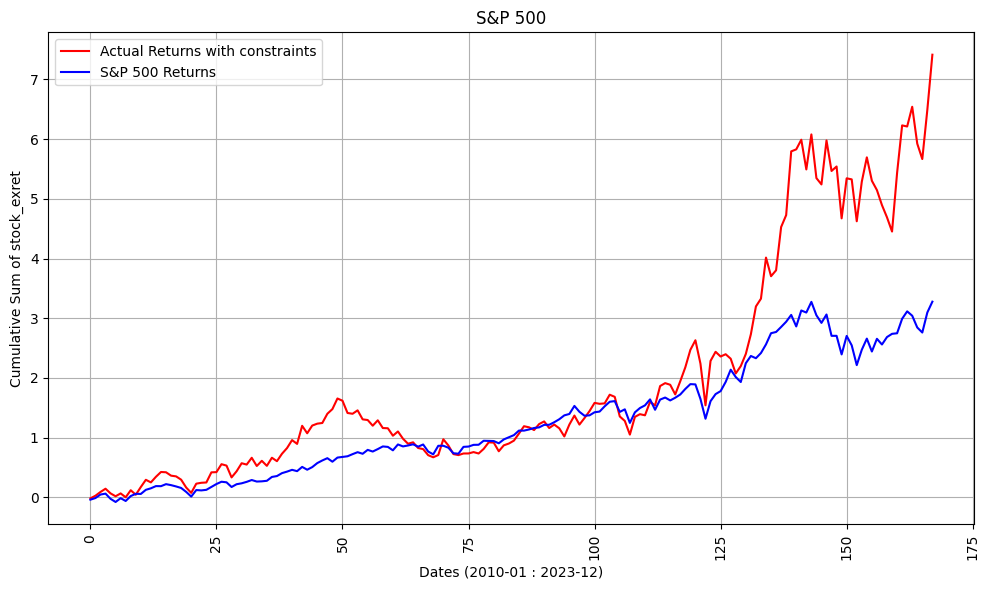

In [15]:
#Plot 

import matplotlib.pyplot as plt

# Calculate the cumulative sum

actreturncum = (1 + total_data['actual_return']).cumprod() - 1
spretcum = (1 + total_data['sp_ret']).cumprod() - 1

# Plot the cumulative sum
plt.figure(figsize=(10, 6))

# Plot the values with different colors and labels for the legend
plt.plot(actreturncum, color='red', label='Actual Returns with constraints')
plt.plot(spretcum, color='blue', label='S&P 500 Returns')

# Add title and labels
plt.title('S&P 500')
plt.xlabel('Dates (2010-01 : 2023-12)')
plt.ylabel('Cumulative Sum of stock_exret')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a grid for readability
plt.grid(True)

# Tight layout to adjust margins
plt.tight_layout()

# Show the plot
plt.show()

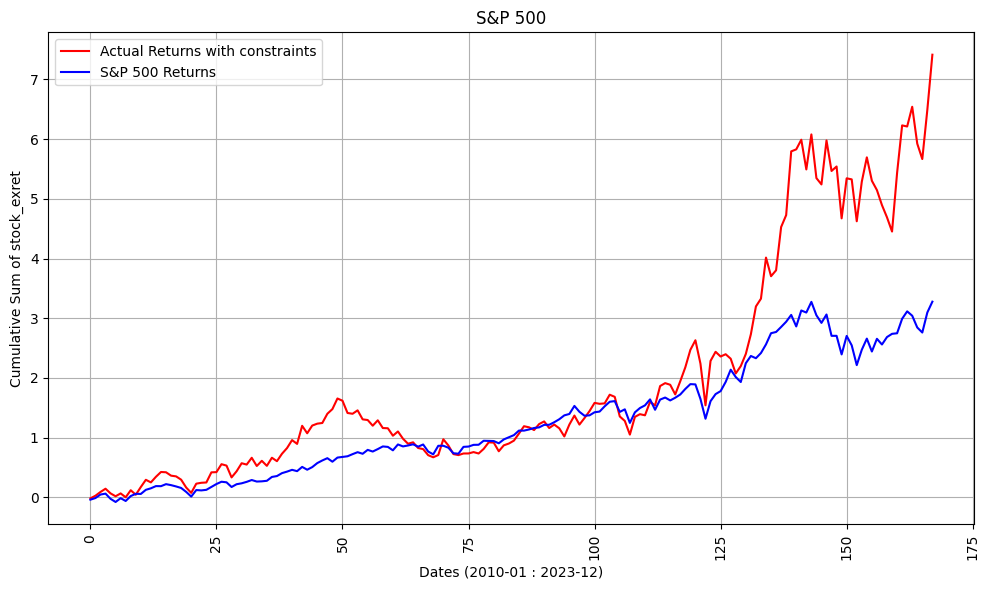

In [16]:
#Plot 

import matplotlib.pyplot as plt

# Calculate the cumulative sum

excesss = (1 + total_data['actual_return']).cumprod() - 1
spretcum = (1 + total_data['sp_ret']).cumprod() - 1

# Plot the cumulative sum
plt.figure(figsize=(10, 6))

# Plot the values with different colors and labels for the legend
plt.plot(actreturncum, color='red', label='Actual Returns with constraints')
plt.plot(spretcum, color='blue', label='S&P 500 Returns')

# Add title and labels
plt.title('S&P 500')
plt.xlabel('Dates (2010-01 : 2023-12)')
plt.ylabel('Cumulative Sum of stock_exret')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a grid for readability
plt.grid(True)

# Tight layout to adjust margins
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
#Calculate annualized returns:
annualized_returns = total_data['actual_return'].mean()*12
print(annualized_returns)

0.1854363688899785


In [18]:
#Calculate Annualized portfolio standard deviation (RISK)
annualized_std = total_data['actual_return'].std()*np.sqrt(12)
print(annualized_std)

0.25798286545441534


In [19]:
#Calculate Annualized Information Ratio:
annualized_IR = annualized_returns/annualized_std
print(annualized_IR)

0.7187933530521408


In [20]:
#Calculate Annualized Sharpe Ratio
#sharpe = Anualized returns / std market
annualized_market_std = total_data['sp_ret'].std()*np.sqrt(12)
annualized_sharpe = annualized_returns/annualized_market_std
print(annualized_sharpe)


1.2513802399055083


In [9]:
#Calculate maximum drawdown
max_drawdown = total_data['actual_return'].min()
print(max_drawdown)

-0.2152183565780024


In [27]:
# Calculate Portfolio Alpha.

# Start by calculating Portfolio Beta:
portfolio_returns=np.array('actual_return')
market_returns= np.array('sp_ret') 

#covariance:
covariance_matrix = np.cov(total_data['actual_return'], total_data['sp_ret'])

# Extract the covariance between the portfolio and market (off-diagonal)
covariance_portfolio_market = covariance_matrix[0, 1]
variance_market = covariance_matrix[1, 1]
beta = covariance_portfolio_market / variance_market
print(beta)

#Alpha Equation: rp - (rfr + beta*(sp_ret-rfr))

alpha = total_data['actual_return'] - (total_data['RF'] + beta * (total_data['sp_ret']-total_data['RF']))
print(alpha)

alpha_df = pd.DataFrame(alpha, columns=['monthly_alpha'])

cumulative_return= (1 + alpha_df['monthly_alpha']).prod()

# Annualized alpha calculation
annualized_alpha = (cumulative_return ** (12 / len(alpha_df))) - 1

print(annualized_alpha)
#annualized_alpha = alpha.mean()
#annualized_alpha = (1 + alpha_df[]).prod() - 1
#print(annualized_alpha)


1.2057347119155792
0      0.029547
1      0.010396
2     -0.009928
3      0.032262
4      0.030589
         ...   
163    0.068092
164   -0.022306
165   -0.009757
166    0.017107
167    0.070705
Length: 168, dtype: float64
0.03180688013346411


In [33]:
#Calcualte the maximum drawdown



#
# Step 1: Calculate Cumulative Returns
total_data['cumulative_return'] = (1 + total_data['actual_return']).cumprod()

# Step 2: Calculate Maximum Drawdown
# Calculate the running maximum of the cumulative returns
total_data['running_max'] = total_data['cumulative_return'].cummax()

# Calculate the drawdown from the running maximum
total_data['drawdown'] = (total_data['cumulative_return'] - total_data['running_max']) / total_data['running_max']

# Calculate the maximum drawdown
max_drawdown = total_data['drawdown'].min()


print("\nMaximum Drawdown:", max_drawdown)



Maximum Drawdown: -0.3705067012230803


In [40]:
#drawdown plot:
# Step 3: Create Drawdown Plot
plt.figure(figsize=(12, 6))
plt.fill_between(total_data['year_month'], total_data['drawdown'], color='red', alpha=0.5)
plt.plot(df['year_month'], df['drawdown'], color='darkred', linewidth=2)
plt.title('Drawdown Plot', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Drawdown', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid()
plt.show()

KeyError: 'drawdown'

<Figure size 1200x600 with 0 Axes>